In [ ]:
import numpy as np
import cv2
import os

os.mkdir('train_label_images')

dir_path = 'train_labels'
image_dir_path = 'train_label_images'
for file in os.listdir(dir_path):
  # print(os.path.join(dir_path, file))
  filename = os.path.splitext(file)[0]
  img_array = np.load(os.path.join(dir_path, file))
  cv2.imwrite(os.path.join(image_dir_path, filename + '.JPG'), img_array)


In [1]:
import tensorflow as tf
import os
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import time
import glob 
import random

In [2]:
import pandas as pd

ids = pd.read_csv('train and test ids.csv')
path = 'Images'
img_list_X_train = []
img_list_X_test = []
for i in ids['train_ids']:
    img_list_X_train.append(os.path.join(path,'crop_row_' + str(i).zfill(3) + '.jpg'))
for i in ids['test_ids']:
    if not np.isnan(i):
        img_list_X_test.append(os.path.join(path,'crop_row_' + str(int(i)).zfill(3) + '.jpg'))

In [4]:
img_list_X_test

['Images/crop_row_162.jpg',
 'Images/crop_row_019.jpg',
 'Images/crop_row_075.jpg',
 'Images/crop_row_244.jpg',
 'Images/crop_row_101.jpg',
 'Images/crop_row_139.jpg',
 'Images/crop_row_067.jpg',
 'Images/crop_row_267.jpg',
 'Images/crop_row_089.jpg',
 'Images/crop_row_241.jpg',
 'Images/crop_row_179.jpg',
 'Images/crop_row_040.jpg',
 'Images/crop_row_219.jpg',
 'Images/crop_row_157.jpg',
 'Images/crop_row_079.jpg',
 'Images/crop_row_136.jpg',
 'Images/crop_row_076.jpg',
 'Images/crop_row_185.jpg',
 'Images/crop_row_204.jpg',
 'Images/crop_row_078.jpg',
 'Images/crop_row_230.jpg',
 'Images/crop_row_051.jpg',
 'Images/crop_row_229.jpg',
 'Images/crop_row_035.jpg',
 'Images/crop_row_110.jpg',
 'Images/crop_row_206.jpg',
 'Images/crop_row_061.jpg',
 'Images/crop_row_171.jpg',
 'Images/crop_row_038.jpg',
 'Images/crop_row_121.jpg',
 'Images/crop_row_262.jpg',
 'Images/crop_row_068.jpg',
 'Images/crop_row_250.jpg',
 'Images/crop_row_133.jpg',
 'Images/crop_row_266.jpg',
 'Images/crop_row_01

In [5]:
img_width = 240
img_height = 240
img_channels = 3
number_of_init_filters = 16

In [6]:
X_train = np.zeros((len(img_list_X_train), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_train):
    # read image
    img_train = imread(img_path)
    img_train = resize(img_train, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
    X_train[i] = img_train

In [7]:
train_output_path1 = 'train_label_images'
img_list_y_train = []
for i in ids['train_ids']:
      img_list_y_train.append(os.path.join(train_output_path1,'crop_row_' + str(i).zfill(3) + '.JPG'))
y_train = np.zeros((len(img_list_y_train), img_height, img_width, 1), dtype=bool)
for i, img_path in enumerate(img_list_y_train):
    # read image
    img_train = imread(img_path)
    img_train = resize(img_train, (img_height, img_width, 1), mode='constant', preserve_range='True')
    y_train[i] = img_train

In [8]:
X_test = np.zeros((len(img_list_X_test), img_height, img_width, img_channels), dtype=np.uint8)
for i, img_path in enumerate(img_list_X_test):
    # read image
    img_test = imread(img_path)
    img_test = resize(img_test, (img_height, img_width, img_channels), mode='constant', preserve_range='True')
    X_test[i] = img_test

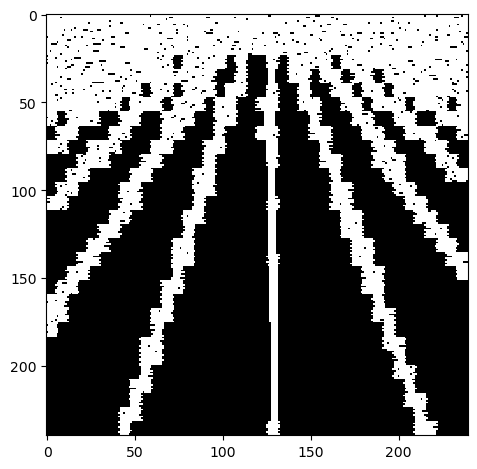

In [9]:
imshow(y_train[0])

In [10]:
inputs = tf.keras.layers.Input(shape=(img_height, img_width, img_channels), name="input_image")
s = tf.keras.layers.Lambda(lambda x: x/255)(inputs)

#Contractional path
cv1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), strides=(1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(s)
cv2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), strides=(1, 1), activation='relu', kernel_initializer='he_normal', padding='same')(cv1)

#DS1
#fire module 1.1 
f1_1 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(cv2)
f1_1l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_1r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_1 = tf.keras.layers.concatenate([f1_1l,f1_1r])

#fire module 1.2
f1_2 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_1)
f1_2l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f1_2r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f1_2 = tf.keras.layers.concatenate([f1_2l,f1_2r])
f1_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool1', padding="same")(f1_2)

#DS2
#fire module 2.1 
f2_1 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f1_2)
f2_1l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_1r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_1 = tf.keras.layers.concatenate([f2_1l,f2_1r])

#fire module 2.2
f2_2 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_1)
f2_2l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f2_2r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f2_2 = tf.keras.layers.concatenate([f2_2l,f2_2r])
f2_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool2', padding="same")(f2_2)


#DS3
#fire module 3.1 
f3_1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f2_2)
f3_1l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_1r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_1 = tf.keras.layers.concatenate([f3_1l,f3_1r])

#fire module 3.2
f3_2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_1)
f3_2l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f3_2r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f3_2 = tf.keras.layers.concatenate([f3_2l,f3_2r])
f3_2 = tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), name='pool3', padding="same")(f3_2)

#DS4
#fire module 4.1 
f4_1 = tf.keras.layers.Conv2D(number_of_init_filters*5, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f3_2)
f4_1l = tf.keras.layers.Conv2D(number_of_init_filters*32, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_1r = tf.keras.layers.Conv2D(number_of_init_filters*32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_1 = tf.keras.layers.concatenate([f4_1l,f4_1r])

#fire module 4.2
f4_2 = tf.keras.layers.Conv2D(number_of_init_filters*5, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_1)
f4_2l = tf.keras.layers.Conv2D(number_of_init_filters*32, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f4_2)
f4_2r = tf.keras.layers.Conv2D(number_of_init_filters*32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f4_2)
f4_2 = tf.keras.layers.concatenate([f4_2l,f4_2r])
f4_2 = tf.keras.layers.Dropout(0.5)(f4_2)


#US1
#Transposed fire module
tf1_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*5, (1,1), strides=(1,1), padding='same', activation='relu')(f4_2)
tf1_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*16, (1,1), strides=(1,1), padding='same', activation='relu')(tf1_1)
tf1_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*16, (2,2), strides=(1,1), padding='same', activation='relu')(tf1_1)
tf1_1 = tf.keras.layers.concatenate([tf1_1l,tf1_1r])
tf1_1 = tf.keras.layers.concatenate([tf1_1,f3_2])

#fire module 5.1 
f5_1 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf1_1)
f5_1l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_1r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_1 = tf.keras.layers.concatenate([f5_1l,f5_1r])

#fire module 5.2
f5_2 = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_1)
f5_2l = tf.keras.layers.Conv2D(number_of_init_filters*16, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f5_2)
f5_2r = tf.keras.layers.Conv2D(number_of_init_filters*16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f5_2)
f5_2 = tf.keras.layers.concatenate([f5_2l,f5_2r])


#US2
#Transposed fire module
tf2_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (1,1), strides=(2,2), padding='same', activation='relu')(f5_2)
tf2_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*8, (1,1), strides=(1,1), padding='same', activation='relu')(tf2_1)
tf2_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*8, (2,2), strides=(1,1), padding='same', activation='relu')(tf2_1)
tf2_1 = tf.keras.layers.concatenate([tf2_1l,tf2_1r])
tf2_1 = tf.keras.layers.concatenate([tf2_1,f2_2])

#fire module 6.1 
f6_1 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf2_1)
f6_1l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_1r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_1 = tf.keras.layers.concatenate([f6_1l,f6_1r])

#fire module 6.2
f6_2 = tf.keras.layers.Conv2D(number_of_init_filters*3, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_1)
f6_2l = tf.keras.layers.Conv2D(number_of_init_filters*8, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f6_2)
f6_2r = tf.keras.layers.Conv2D(number_of_init_filters*8, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f6_2)
f6_2 = tf.keras.layers.concatenate([f6_2l,f6_2r])


#US3
#Transposed fire module
tf3_1 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*3, (1,1), strides=(2,2), padding='same', activation='relu')(f6_2)
tf3_1l = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (1,1), strides=(1,1), padding='same', activation='relu')(tf3_1)
tf3_1r = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (2,2), strides=(1,1), padding='same', activation='relu')(tf3_1)
tf3_1 = tf.keras.layers.concatenate([tf3_1l,tf3_1r])
tf3_1 = tf.keras.layers.concatenate([tf3_1,f1_2])

#fire module 6.1 
f7_1 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(tf3_1)
f7_1l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_1r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_1 = tf.keras.layers.concatenate([f7_1l,f7_1r])

#fire module 6.2
f7_2 = tf.keras.layers.Conv2D(number_of_init_filters*2, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_1)
f7_2l = tf.keras.layers.Conv2D(number_of_init_filters*4, (1,1), activation='relu', kernel_initializer='he_normal', padding='same')(f7_2)
f7_2r = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(f7_2)
f7_2 = tf.keras.layers.concatenate([f7_2l,f7_2r])

t9 = tf.keras.layers.Conv2DTranspose(number_of_init_filters*4, (2,2), strides=(2,2), padding='same', activation='relu')(f7_2)
c1 = tf.keras.layers.concatenate([t9,cv2])
cv3 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
cv4 = tf.keras.layers.Conv2D(number_of_init_filters*4, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(cv3)


outputs = tf.keras.layers.Conv2D(1, (1,1), activation='sigmoid')(cv4)


model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 240, 240, 3)  0           ['input_image[0][0]']            
                                                                                                  
 conv2d (Conv2D)                (None, 240, 240, 64  1792        ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

                                                                  'conv2d_19[0][0]']              
                                                                                                  
 pool3 (MaxPooling2D)           (None, 30, 30, 512)  0           ['concatenate_5[0][0]']          
                                                                                                  
 conv2d_20 (Conv2D)             (None, 30, 30, 80)   41040       ['pool3[0][0]']                  
                                                                                                  
 conv2d_21 (Conv2D)             (None, 30, 30, 512)  41472       ['conv2d_20[0][0]']              
                                                                                                  
 conv2d_22 (Conv2D)             (None, 30, 30, 512)  369152      ['conv2d_20[0][0]']              
                                                                                                  
 concatena

                                                                                                  
 conv2d_36 (Conv2D)             (None, 60, 60, 128)  6272        ['conv2d_35[0][0]']              
                                                                                                  
 conv2d_37 (Conv2D)             (None, 60, 60, 128)  55424       ['conv2d_35[0][0]']              
                                                                                                  
 concatenate_15 (Concatenate)   (None, 60, 60, 256)  0           ['conv2d_36[0][0]',              
                                                                  'conv2d_37[0][0]']              
                                                                                                  
 conv2d_transpose_6 (Conv2DTran  (None, 120, 120, 48  12336      ['concatenate_15[0][0]']         
 spose)                         )                                                                 
          

In [ ]:
# #Testing images 

# img_list_y_test = sorted(glob.glob(test_expected_output))
# y_test = np.zeros((len(img_list_y_test), img_height, img_width, 1), dtype=np.bool)
# for i, img_path in enumerate(img_list_y_test):
#     # read image
#     img_test = imread(img_path)
#     img_test = resize(img_test, (img_height, img_width, 1), mode='constant', preserve_range='True')
#     y_test[i] = img_test

In [11]:
#Model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

name = "SqueezeUnet-{}".format(int(time.time()))
callbacks = [ 
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.TensorBoard(log_dir='tensorboard/{}'.format(name))]

results = model.fit(X_train, y_train, validation_split=0.1, batch_size=4, epochs=20, callbacks=callbacks)

model.save("SqueezeUnet.h5")

Epoch 1/20


2023-05-06 22:39:20.403793: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


48/48 [==============================] - 215s 4s/step - loss: 0.6147 - accuracy: 0.6867 - val_loss: 0.5654 - val_accuracy: 0.7251
Epoch 2/20
48/48 [==============================] - 208s 4s/step - loss: 0.5865 - accuracy: 0.6924 - val_loss: 0.6056 - val_accuracy: 0.6949
Epoch 3/20
48/48 [==============================] - 204s 4s/step - loss: 0.5765 - accuracy: 0.7127 - val_loss: 0.6316 - val_accuracy: 0.6920
Epoch 4/20
48/48 [==============================] - 168s 3s/step - loss: 0.5635 - accuracy: 0.7157 - val_loss: 0.5246 - val_accuracy: 0.7197
Epoch 5/20
48/48 [==============================] - 122s 3s/step - loss: 0.5256 - accuracy: 0.7442 - val_loss: 0.4617 - val_accuracy: 0.7797
Epoch 6/20
48/48 [==============================] - 127s 3s/step - loss: 0.4820 - accuracy: 0.7723 - val_loss: 0.4838 - val_accuracy: 0.7744
Epoch 7/20
48/48 [==============================] - 134s 3s/step - loss: 0.4497 - accuracy: 0.7850 - val_loss: 0.4305 - val_accuracy: 0.7670
Epoch 8/20
48/48 [======

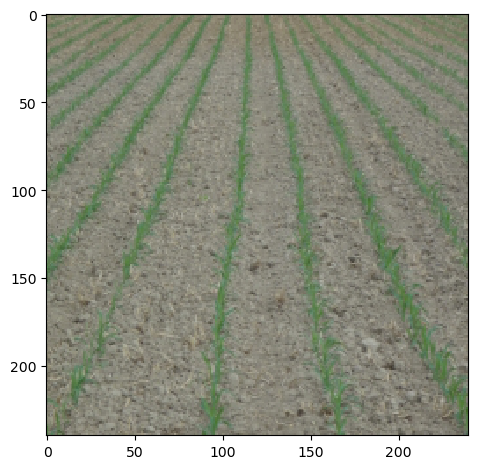

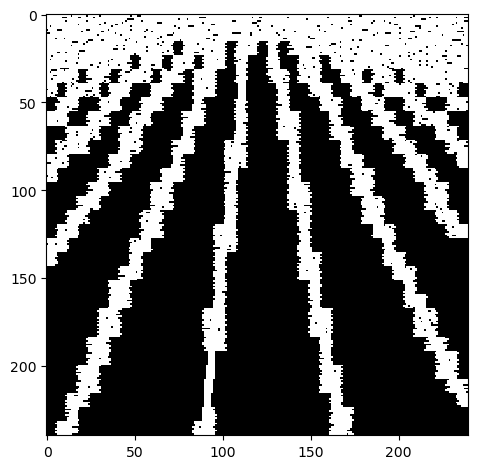

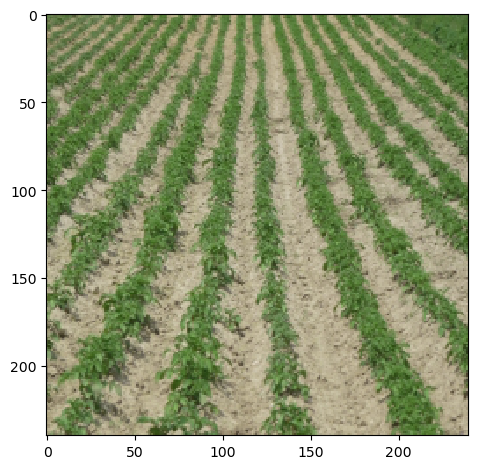

In [12]:
#plota uma amostra
ix = random.randint(0, len(img_list_X_train))
imshow(X_train[ix])
plt.show()
imshow(np.squeeze(y_train[ix]))
plt.show()
imshow(np.squeeze(X_test[random.randint(0, len(img_list_X_test)-1)]))
plt.show()


3/3 [==============================] - 16s 4s/step


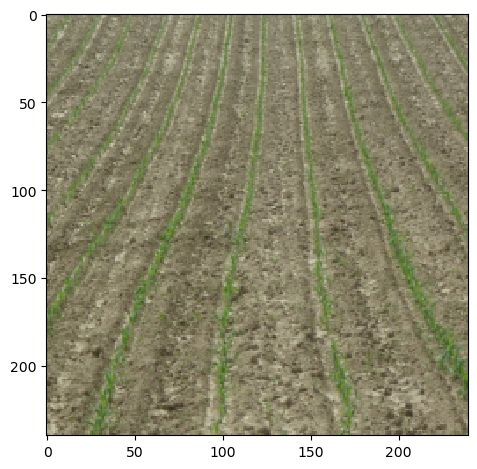

/Users/balarusum/opt/anaconda3/envs/tensor-env/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


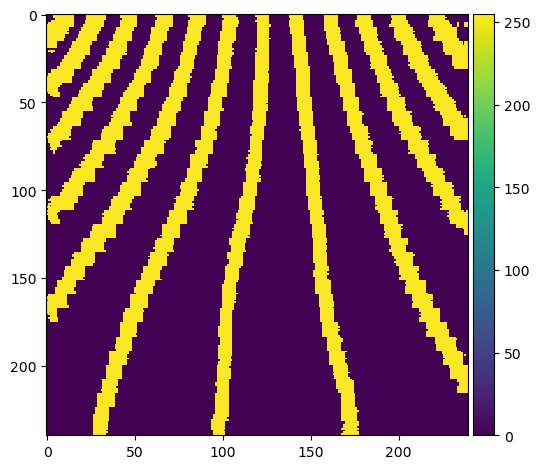

In [13]:
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

preds_train_t = (preds_train >0.5).astype(np.int32)
preds_val_t = (preds_val >0.5).astype(np.int32)
preds_test_t = (preds_test > 0.5).astype(np.int32) * 255

idx = random.randint(0, len(preds_test_t)-1)
imshow(X_test[idx])
plt.show()
imshow(preds_test_t[idx])
plt.show()

In [ ]:
preds_test_t.shape[0]

In [16]:
rles = []

for i in range(preds_test_t.shape[0]):
    id = img_list_X_test[i][16:19]
    rle = encode_mask_to_rle(preds_test_t[i])
    rles.append(rle)
    
df = pd.DataFrame({'ids': [img_list_X_test[i][16:19]  for i in range(preds_test_t.shape[0])], 'labels': rles})

    

In [17]:
df.to_csv('predictions2.csv', index=False)

In [ ]:
data = np.load("train_labels/crop_row_016.npy")
rle_enc = encode_mask_to_rle(data)
data.shape


In [15]:
def encode_mask_to_rle(mask):
    '''
    mask: numpy array binary mask 
    255 - mask 
    0 - background
    Returns encoded run length 
    '''
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    
    return ' '.join(str(x) for x in runs)


def decode_rle_to_mask(rle, height = 240, width = 320):
    '''
    rle : run-length as string formated (start value, count)
    height : height of the mask 
    width : width of the mask
    returns binary mask
    '''
    rle = np.array(rle.split(' ')).reshape(-1, 2)
    mask = np.zeros((height*width))
    color = 255
    for i in rle:
        mask[int(i[0]):int(i[0])+int(i[1])] = color

    return mask.reshape(height, width)